In [1]:
### Desa Bolger and Emma Beyer
### Add more info here, email address etc.

#The goal of this document is to answer the question: What is the most common depth range for these wrecks?

In [2]:
#Read in the packages
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [11]:
#read in file that has wrecks with bathymetry data in NC EEZ (from ArcGIS model DepthAnalysis)
NCwreck = gpd.read_file('../Data/Processed/ONLYncWRECKS.shp')

#confirm the data looks okay after the migration to python
NCwreck.head()

,Join_Count,TARGET_FID,FID_Wrecks,positionqu,objectname,objectcate,yearsunk,comment,datasource,sourcereco,...,Shape_Area,UIDENT,DEPTH,RANGE,EDIT,EDIT_DATE,Shape_Le_1,Shape__Are,Shape__Len,geometry
0,1,0,34975,Low,HERCULES,wreck,0.0,"00470 01 DATED 1923 24 NO.8824 - SCHOONER, 163...",AWOIS,AWOIS,...,1.210719e+10,12109,3,501-2500 metres in depth,NEW,20060000,1.116557e+08,4.352814e+12,1.116557e+08,POINT (-79.5831 30.71691)
1,1,1,34980,Low,ESSO GETTYSBURG,wreck,0.0,"00478 24 NO.1162 - TANKER, 10172 GT - SUNK 6/1...",AWOIS,AWOIS,...,1.210719e+10,12109,3,501-2500 metres in depth,NEW,20060000,1.116557e+08,4.352814e+12,1.116557e+08,POINT (-79.24976 31.00024)
2,1,2,34981,Low,DAISY FORLIN,wreck,0.0,"00479 01 1920 24 NO.8804 - 466 GT, SUNK 11/18/...",AWOIS,AWOIS,...,1.210719e+10,289909,1,0-200 metres in depth,NEW,20060000,3.649745e+08,6.383595e+12,3.649745e+08,POINT (-80.16646 31.00024)
3,1,3,23998,None,None,wreck,0.0,None,US4GA11M.000,ENCAWPT,...,1.210719e+10,289909,1,0-200 metres in depth,NEW,20060000,3.649745e+08,6.383595e+12,3.649745e+08,POINT (-80.96661 31.31684)
4,1,4,34987,Low,None,wreck,0.0,"NM41/47(5360) WK OF A TUG, WILL BE MARKED WITH...",AWOIS,AWOIS,...,1.210719e+10,289909,1,0-200 metres in depth,NEW,20060000,3.649745e+08,6.383595e+12,3.649745e+08,POINT (-80.96648 31.3169)


In [12]:
#just curious about how many wrecks are included in this
NCwreck.shape #3462, 27

(3462, 37)

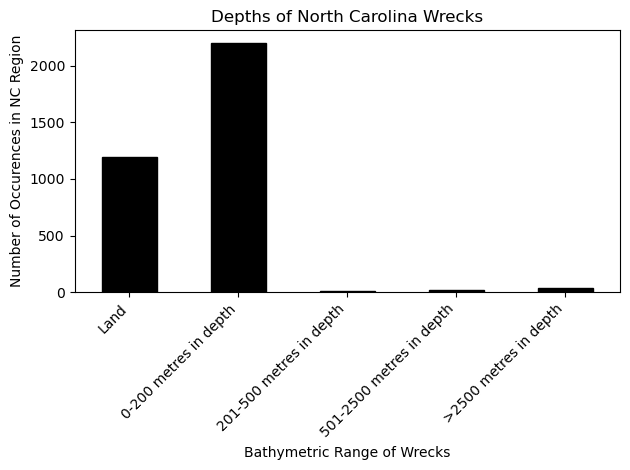

In [13]:
#Visualize depth counts graphically

#Make an order by depth, as they were not from lowest to highest on first try
custom_order = ['Land', '0-200 metres in depth', '201-500 metres in depth', '501-2500 metres in depth', '>2500 metres in depth']

#apply this rankiing to "RANGE" column
NCwreck['RANGE'] = pd.Categorical(NCwreck['RANGE'], categories=custom_order, ordered=True)

#Count how many times each depth grouping occurred
range_counts = NCwreck.groupby('RANGE').size()

#plot!
range_counts.plot(kind='bar', color='black', edgecolor='black')

#add labels and titles!
plt.xlabel('Bathymetric Range of Wrecks')
plt.xticks(rotation=45, ha = "right", va = 'top')
plt.ylabel('Number of Occurences in NC Region')
plt.title('Depths of North Carolina Wrecks')

#I have heard this is important to make sure all aspects download to the final image.
plt.tight_layout()

#Downloading that graph for the storymap!
plt.savefig('../Products/NC_Wrecks_Depths.png', dpi=300)

#I want to see the graph!
plt.show()

In [14]:
#the rest (visualizing in a map...) is occuring in arcGIS -- I think those are prettier!